#Week 4

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralCoclustering

##4.1.1: Getting Started with Pandas

In this video, you will...
  
  >Learn how to use Pandas Series
  
  >Learn how to use Pandas DataFrames

In [ ]:
x=pd.Series(data=(7,5,6,9), index=("q","w","e","r"))
y=pd.Series(data=(2,2,5,1), index=("a","p","w","q"))

>Suma de series

In [ ]:
x+y

a     NaN
e     NaN
p     NaN
q     8.0
r     NaN
w    10.0
dtype: float64

>Serie a partir de un dictionary

In [ ]:
data={"lius":12,"emma":52,"fan":38 }

In [ ]:
names=pd.Series(data)

>Organizar los indices de una serie o dataframe

In [ ]:
sorted_names=sorted(names.index,reverse=True)

In [ ]:
names.reindex(sorted_names)

lius    12
fan     38
emma    52
dtype: int64

##4.1.2: Loading and Inspecting Data
In this video, you will...

>Learn how to load a CSV file using Pandas

>Learn how to view the beginning and end of a Pandas DataFrame

>Learn how to index a Pandas DataFrame by location

In [ ]:
wiskey=pd.read_csv("/content/whiskies.txt")
wiskey["Regions"]=pd.read_csv("/content/regions.txt")

>Metodo iloc para filtrar datos

In [ ]:
flavors=wiskey.iloc[:, 2:14]

>Calcular la correlacion entre las columnas.

In [ ]:
corr_flavors=pd.DataFrame.corr(flavors)
corr_wiskey=pd.DataFrame.corr(flavors.transpose())

In [ ]:
gg=flavors.corr()==pd.DataFrame.corr(flavors)
gg.mean()

Body         1.0
Sweetness    1.0
Smoky        1.0
Medicinal    1.0
Tobacco      1.0
Honey        1.0
Spicy        1.0
Winey        1.0
Nutty        1.0
Malty        1.0
Fruity       1.0
Floral       1.0
dtype: float64

In [ ]:
df=pd.DataFrame([(10,20,30),(15,25,35),(1,2,3)],columns=["a","b","c"])
df.corr()

,a,b,c
a,1.000000,0.988478,0.977110
b,0.988478,1.000000,0.998052
c,0.977110,0.998052,1.000000


>graficar la correlación

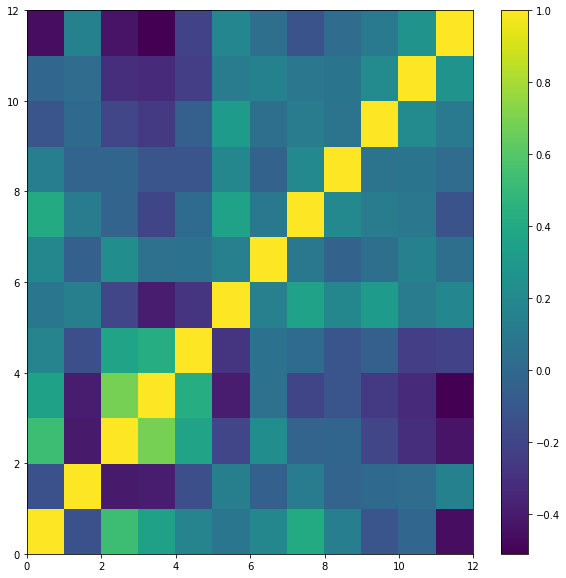

In [ ]:
plt.figure(figsize=(10,10))
plt.pcolor(corr_flavors)
plt.colorbar()

>correlacion entre wiskeys

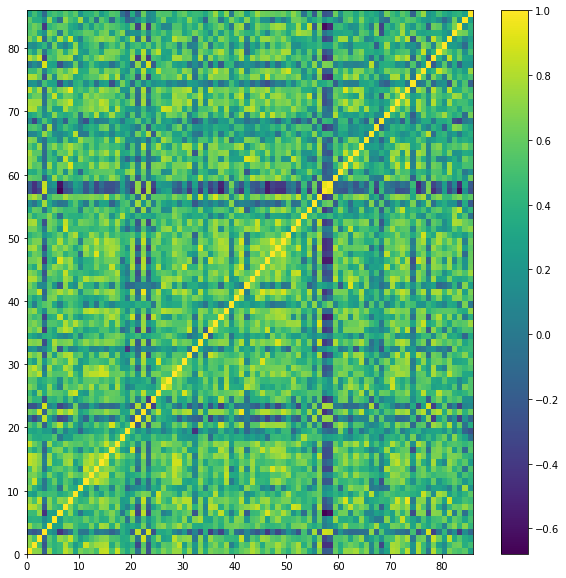

In [ ]:
plt.figure(figsize=(10,10))
plt.pcolor(corr_wiskey)
plt.colorbar()

##4.1.4: Clustering Whiskies By Flavor Profile

In this video, you will...

>Learn how to use spectral co-clustering to cluster whiskies based on their flavor profiles

>Aplicando clustering, pero no entiendo.

What is spectral co-clustering?
A method for finding clusters of objects by the similarity of their attributes

In [ ]:
model= SpectralCoclustering(n_clusters=6,random_state=0)
model.fit(corr_wiskey)
model_r=model.rows_

In [ ]:
np.sum(model_r, 1)

array([20,  5, 19, 17,  6, 19])

retorna 6 grupos

19 en el grupo 2

5 en el grupo 1

In [ ]:
np.sum(model_r, 0)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

##4.1.5: Comparing Correlation Matrices

In this video, you will...

>Learn how to compare correlation matrices

In [ ]:
wiskey["Group"]= pd.Series(model.row_labels_, index=wiskey.index)
wiskey=wiskey.iloc[np.argsort(model.row_labels_)]
#wiskey=wiskey.loc[np.argsort(model.row_labels_)]
wiskey=wiskey.reset_index(drop=True)

wiskey

,RowID,Distillery,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Postcode,Latitude,Longitude,Regions,Group
0,86,Tullibardine,2,3,0,0,1,0,2,1,1,2,2,1,PH4 1QG,289690,708850,Highlands,0
1,34,GlenElgin,2,3,1,0,0,2,1,1,1,1,2,3,IV30 3SL,322640,861040,Speyside,0
2,33,GlenDeveronMacduff,2,3,1,1,1,1,1,2,0,2,0,1,AB4 3JT,372120,860400,Speyside,0
3,41,GlenSpey,1,3,1,0,0,0,1,1,1,2,0,2,AB38 7AU,327760,849140,Speyside,0
4,46,Glenfiddich,1,3,1,0,0,0,0,0,0,2,2,2,AB55 4DH,332680,840840,Speyside,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,47,Glengoyne,1,2,0,0,0,1,1,1,2,2,3,2,G63 9LB,252810,682750,Highlands,5
82,32,Edradour,2,3,1,0,0,2,1,1,4,2,2,2,PH16 5JP,295960,757940,Highlands,5
83,36,GlenGrant,1,2,0,0,0,1,0,1,2,1,2,1,AB38 7BS,327610,849570,Speyside,5
84,72,Scapa,2,2,1,1,0,2,1,1,2,2,2,2,KW15 1SE,342850,1008930,Islands,5


In [ ]:
correlations=pd.DataFrame.corr(wiskey.iloc[:,2:14].transpose())
correlations

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85
0,1.000000,0.449042,4.621682e-01,0.592638,0.630087,0.601457,0.573819,0.424397,-0.059028,0.326236,0.543577,0.614335,0.526572,0.706058,0.561758,0.389833,0.414634,0.636595,0.354507,0.507630,-4.029166e-17,-0.196818,-0.246514,0.069843,3.825460e-01,0.549156,0.707317,0.320061,0.463415,-0.148457,0.749676,0.496309,0.282017,0.382546,-0.029691,0.495142,0.260290,0.572637,0.483030,0.190879,...,0.156174,4.893545e-01,0.362915,0.434023,0.609756,0.389833,0.483887,0.303273,0.594399,0.653000,0.267222,0.318298,0.543577,0.170732,0.620437,-0.203005,0.120972,0.190879,-0.101649,-0.251561,-0.120972,0.282017,0.502953,0.424397,0.462168,0.489355,0.452077,0.295141,0.407795,0.512936,0.328031,0.245416,0.385987,0.572637,0.504753,0.609756,4.077954e-01,0.504753,0.349215,0.267222
1,0.449042,1.000000,2.897749e-01,0.574257,0.708794,0.667267,0.895813,0.651120,0.514776,0.263432,0.694656,0.793708,0.708668,0.701053,0.807117,0.713514,0.638112,0.582581,0.511450,0.783374,1.562929e-01,0.021190,0.147871,-0.067677,-6.178021e-02,0.717945,0.449042,0.516890,0.496309,0.105492,0.598981,0.740458,0.309706,0.494242,0.335655,0.490815,0.218588,0.655763,0.660069,0.554877,...,0.453990,6.585792e-01,0.742391,0.624470,0.732647,0.713514,0.625172,0.698750,0.635037,0.794990,0.623360,0.753929,0.541985,0.685379,0.674066,-0.252911,-0.195366,-0.050443,-0.276727,-0.385951,-0.195366,0.783374,0.516890,0.342695,0.711266,0.605893,0.697644,0.171592,0.605893,0.777401,0.656904,0.626938,0.700081,0.857537,0.584999,0.638112,6.058929e-01,0.623360,0.744445,0.700081
2,0.462168,0.289775,1.000000e+00,0.660578,0.411706,0.204037,0.426401,0.354787,0.197386,0.090909,0.289775,0.391293,0.097823,0.320630,0.626159,0.337963,0.353423,0.354787,0.079030,0.691564,2.696799e-01,-0.219382,-0.431788,-0.233550,-6.509259e-17,0.495519,0.570914,0.152894,0.081559,0.231666,0.571739,0.237089,0.440086,0.639602,0.364047,0.399656,0.367497,0.406181,0.207079,0.290129,...,0.000000,6.560409e-17,0.134840,-0.219900,0.135932,-0.048280,-0.134840,-0.022536,0.356753,0.279946,-0.099286,0.118262,0.184402,0.081559,0.062869,0.290929,0.044947,0.135394,0.080930,0.140200,-0.134840,0.188608,-0.050965,0.354787,0.151515,0.090909,0.055989,0.197386,0.090909,0.395820,-0.219382,0.174078,0.033095,0.174078,0.165476,-0.081559,-3.532528e-17,0.033095,0.077850,0.165476
3,0.592638,0.574257,6.605783e-01,1.000000,0.703906,0.529503,0.677772,0.644503,0.358569,0.330289,0.669966,0.444262,0.266557,0.529503,0.706018,0.263117,0.691411,0.429669,0.287128,0.685248,3.674235e-01,0.000000,0.000000,0.141421,1.936492e-01,0.741305,0.493865,0.277746,0.197546,0.240481,0.798935,0.287128,0.456832,0.677772,0.360722,0.276576,0.140546,0.527046,0.300942,0.351364,...,0.474342,6.605783e-01,0.612372,0.399468,0.691411,0.613941,0.367423,0.409387,0.648074,0.711967,0.360722,0.429669,0.669966,0.592638,0.571040,0.000000,-0.081650,0.000000,-0.058807,-0.191014,0.000000,0.456832,0.370328,0.644503,0.550482,0.578006,0.508548,0.478091,0.330289,0.719042,0.265684,0.361403,0.480963,0.527046,0.601204,0.395092,4.954337e-01,0.360722,0.424264,0.480963
4,0.630087,0.708794,4.117056e-01,0.703906,1.000000,0.753206,0.653156,0.598592,0.262915,0.387488,0.849149,0.729677,0.651497,0.597906,0.776516,0.424439,0.543179,0.819126,0.512296,0.720176,3.592106e-01,0.019481,0.073199,0.311086,2.839809e-01,0.427076,0.543179,0.067884,0.325907,-0.167513,0.620956,0.554403,0.184231,0.369175,0.361476,0.299123,0.046374,0.510113,0.342025,0.108206,...,0.556487,6.781033e-01,0.790263,0.644389,0.803905,0.578781,0.466974,0.750443,0.909651,0.909840,0.731768,0.693107,0.793007,0.412816,0.720176,-0.025834,0.107763,0.108206,-0.021560,-0.186745,-0.035921,0.720176,0.393730,0.504078,0.702321,0.557013,0.730855,0.262915,0.411706,0.714686,0.370138,0.457114,0.484906,0.510113,0.484906,0.630087,4.117056e-01,0.520172,0.559954,0.48

In [ ]:
correlations=np.array(correlations)
correlations

array([[1.        , 0.44904168, 0.46216816, ..., 0.50475261, 0.34921515,
        0.26722197],
       [0.44904168, 1.        , 0.28977485, ..., 0.62335961, 0.74444508,
        0.7000808 ],
       [0.46216816, 0.28977485, 1.        , ..., 0.03309517, 0.07784989,
        0.16547585],
       ...,
       [0.50475261, 0.62335961, 0.03309517, ..., 1.        , 0.76520727,
        0.6626506 ],
       [0.34921515, 0.74444508, 0.07784989, ..., 0.76520727, 1.        ,
        0.76520727],
       [0.26722197, 0.7000808 , 0.16547585, ..., 0.6626506 , 0.76520727,
        1.        ]])

Graficar ambas correlaciones

(0.0, 86.0, 0.0, 86.0)

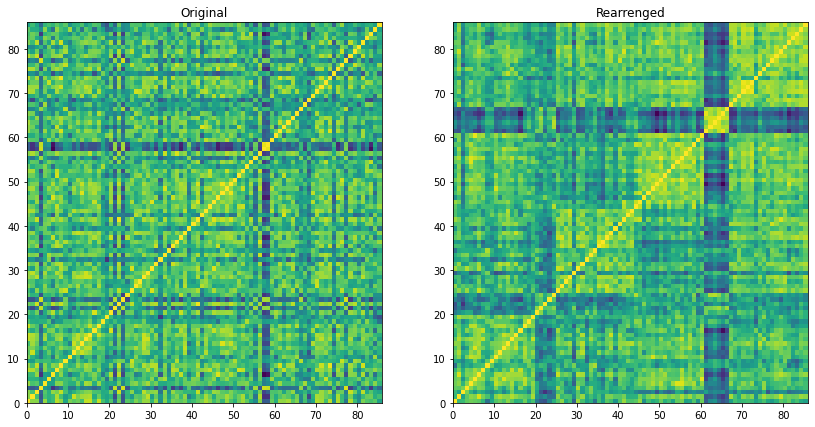

In [ ]:
plt.figure(figsize=(14,7))
plt.subplot(121)
plt.pcolor(corr_wiskey,)
plt.title("Original")
plt.axis("tight")
plt.subplot(122)
plt.pcolor(correlations)
plt.title("Rearrenged")
plt.axis("tight")

In [ ]:
data = pd.Series([1,2,3,4])
data

0    1
1    2
2    3
3    4
dtype: int64

In [ ]:
data = data.iloc[[3,0,1,2]]
data

3    4
0    1
1    2
2    3
dtype: int64

In [ ]:
data[0]

1

## 4.2.1: Introduction to GPS Tracking of Birds
In this video, you will...

>Learn how GPS data can be used to track bird migration patterns


>Leer un csv from a link

In [ ]:
databird=pd.read_csv("https://courses.edx.org/assets/courseware/v1/6184eb0f87c7b58db1a5c336e436ed09/asset-v1:HarvardX+PH526x+2T2021+type@asset+block/bird_tracking.csv")
databird.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61920 entries, 0 to 61919
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          61920 non-null  int64  
 1   altitude            61920 non-null  int64  
 2   date_time           61920 non-null  object 
 3   device_info_serial  61920 non-null  int64  
 4   direction           61477 non-null  float64
 5   latitude            61920 non-null  float64
 6   longitude           61920 non-null  float64
 7   speed_2d            61477 non-null  float64
 8   bird_name           61920 non-null  object 
dtypes: float64(4), int64(3), object(2)
memory usage: 4.3+ MB


In [ ]:
databird.tail()

,Unnamed: 0,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name
61915,61915,11,2014-04-30 22:00:08+00,833,45.448157,51.352572,3.177151,0.208087,Sanne
61916,61916,6,2014-04-30 22:29:57+00,833,-112.073055,51.352585,3.177144,1.522662,Sanne
61917,61917,5,2014-04-30 22:59:52+00,833,69.989037,51.352622,3.177257,3.120545,Sanne
61918,61918,16,2014-04-30 23:29:43+00,833,88.376373,51.354641,3.181509,0.592115,Sanne
61919,61919,9,2014-04-30 23:59:34+00,833,149.949008,51.354474,3.181057,0.485489,Sanne


## 4.2.2: Simple Data Visualizations

In this video, you will...

> Learn how to plot latitude and longitude on a simple 2D plot

In [ ]:
databird=pd.read_csv("https://courses.edx.org/assets/courseware/v1/6184eb0f87c7b58db1a5c336e436ed09/asset-v1:HarvardX+PH526x+2T2021+type@asset+block/bird_tracking.csv")
ix = databird.bird_name == "Eric"
ix

0         True
1         True
2         True
3         True
4         True
         ...  
61915    False
61916    False
61917    False
61918    False
61919    False
Name: bird_name, Length: 61920, dtype: bool

> Solo imprime los datos de Eric el pollo.

In [ ]:
x,y = databird.longitude[ix], databird.latitude[ix]

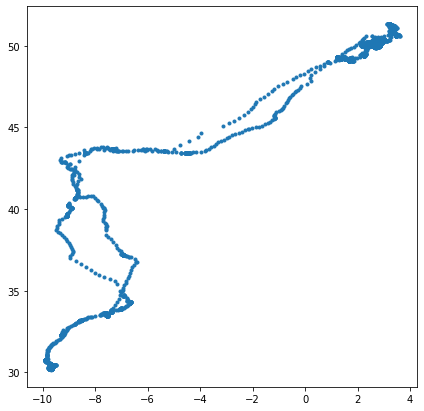

In [ ]:
plt.figure(figsize=(7,7))
plt.plot(x,y,".")

In [ ]:
bird_names=databird.bird_name.unique()

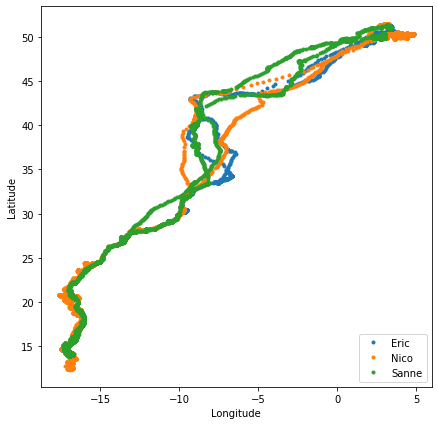

In [ ]:
plt.figure(figsize=(7,7))
for bird_name in bird_names:
  ix = databird.bird_name == bird_name
  x,y = databird.longitude[ix], databird.latitude[ix]
  plt.plot(x,y,".", label=bird_name)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(loc="lower right")

## 4.2.3: Examining Flight Speed

In this video, you will...

> Learn how to examine 2D flight speed of the birds

> Learn how to deal with data entries that are not numeric


Text(0.5, 0, 'velocidades m/s')

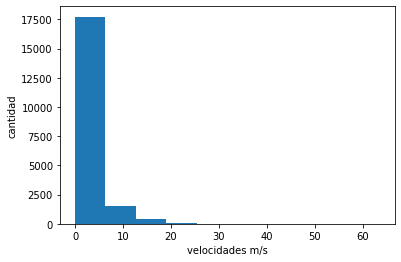

In [ ]:
databird=pd.read_csv("https://courses.edx.org/assets/courseware/v1/6184eb0f87c7b58db1a5c336e436ed09/asset-v1:HarvardX+PH526x+2T2021+type@asset+block/bird_tracking.csv")
ix = databird.bird_name == "Eric"
speed=databird.speed_2d[ix]
plt.hist(speed)
plt.ylabel("cantidad")
plt.xlabel("velocidades m/s")

0    0.150000
1    2.438360
2    0.596657
3    0.310161
4    0.193132
5    2.904772
6    3.080584
7    2.199659
8    2.640076
9    4.592211
Name: speed_2d, dtype: float64

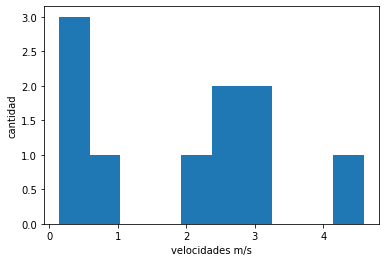

In [ ]:
plt.hist(speed[:10])
plt.ylabel("cantidad")
plt.xlabel("velocidades m/s")
speed[:10]

> find NAN elements

In [ ]:
np.isnan(speed)
np.isnan(speed).any()

True

> number of NAN in Data frame

In [ ]:
sum(np.isnan(speed)) #True = 1, False = 0

85

In [ ]:
ind=np.isnan(speed)
ind

0        False
1        False
2        False
3        False
4        False
         ...  
19790    False
19791    False
19792    False
19793    False
19794    False
Name: speed_2d, Length: 19795, dtype: bool

>change the ind

(array([1.7732e+04, 1.5020e+03, 3.6900e+02, 7.8000e+01, 1.2000e+01,
        7.0000e+00, 3.0000e+00, 2.0000e+00, 3.0000e+00, 2.0000e+00]),
 array([ 0.        ,  6.34880658, 12.69761316, 19.04641974, 25.39522632,
        31.7440329 , 38.09283948, 44.44164607, 50.79045265, 57.13925923,
        63.48806581]),
 <a list of 10 Patch objects>)

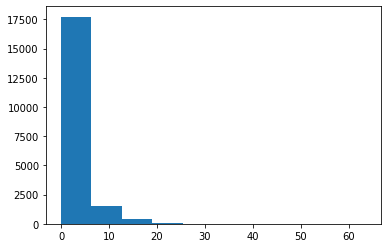

In [ ]:
~ind
plt.hist(speed[~ind])

Text(0.5, 0, 'Speeds m/s')

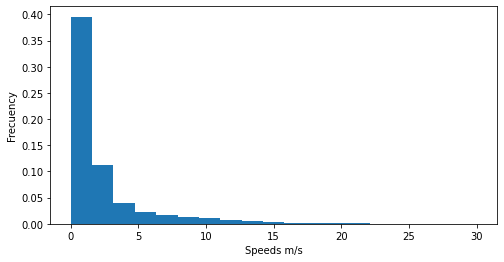

In [ ]:
plt.figure(figsize=(8,4))
plt.hist(speed[~ind], bins=np.linspace(0,30,20), density=True)
plt.ylabel("Frecuency")
plt.xlabel("Speeds m/s")

Text(0.5, 0, '2D Speed')

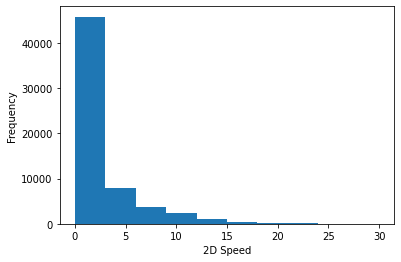

In [ ]:
databird.speed_2d.plot(kind="hist", range=[0,30])
plt.xlabel("2D Speed")

## 4.2.4: Using Datetime

In this video, you will...

>Learn how deal with timestamped data using datetime

>Learn how to measure elapsed time

In [6]:
databird=pd.read_csv("https://courses.edx.org/assets/courseware/v1/6184eb0f87c7b58db1a5c336e436ed09/asset-v1:HarvardX+PH526x+2T2021+type@asset+block/bird_tracking.csv")
databird.date_time[:3]

0    2013-08-15 00:18:08+00
1    2013-08-15 00:48:07+00
2    2013-08-15 01:17:58+00
Name: date_time, dtype: object

In [7]:
import datetime as time

>Tiempo de Hoy

In [8]:
time1=time.datetime.today()

In [9]:
time2=time.datetime.today()
time2

datetime.datetime(2022, 1, 1, 23, 46, 41, 716081)

In [10]:
date_str=databird.date_time
type(date_str[0])
date_str[0][:-3]

'2013-08-15 00:18:08'

> Pasar al formato DataTime

In [11]:
time.datetime.strptime(date_str[0][:-3], "%Y-%m-%d %H:%M:%S" )

datetime.datetime(2013, 8, 15, 0, 18, 8)

> Recorrer y modificar

In [12]:
timestamp=[]
for k in range(len(databird.date_time)):
  timestamp.append(time.datetime.strptime(date_str[k][:-3], "%Y-%m-%d %H:%M:%S" ))
timestamp[:3]

[datetime.datetime(2013, 8, 15, 0, 18, 8),
 datetime.datetime(2013, 8, 15, 0, 48, 7),
 datetime.datetime(2013, 8, 15, 1, 17, 58)]

> Agregar nueva columna

In [13]:
databird["Timestamp"]=pd.Series(timestamp, index=databird.index)
databird.Timestamp

0       2013-08-15 00:18:08
1       2013-08-15 00:48:07
2       2013-08-15 01:17:58
3       2013-08-15 01:47:51
4       2013-08-15 02:17:42
                ...        
61915   2014-04-30 22:00:08
61916   2014-04-30 22:29:57
61917   2014-04-30 22:59:52
61918   2014-04-30 23:29:43
61919   2014-04-30 23:59:34
Name: Timestamp, Length: 61920, dtype: datetime64[ns]

In [14]:
databird.columns

Index(['Unnamed: 0', 'altitude', 'date_time', 'device_info_serial',
       'direction', 'latitude', 'longitude', 'speed_2d', 'bird_name',
       'Timestamp'],
      dtype='object')

In [15]:
times=databird.Timestamp[databird.bird_name=="Eric"]
time_elapsed=[timex-times[0] for timex in times]

In [16]:
time_elapsed[1000]

Timedelta('12 days 02:02:00')

Text(0.5, 0, 'Observations')

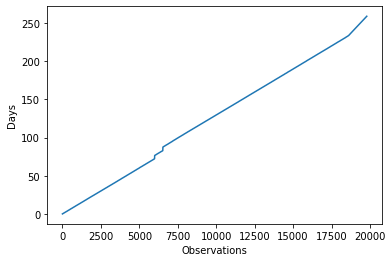

In [17]:
plt.plot(np.array(time_elapsed)/ time.timedelta(days=1))
plt.ylabel("Days")
plt.xlabel("Observations")

>Prueba crear una grafica en donde se muestren las velocidades y las muestras de las tres aves.

KeyboardInterrupt: ignored

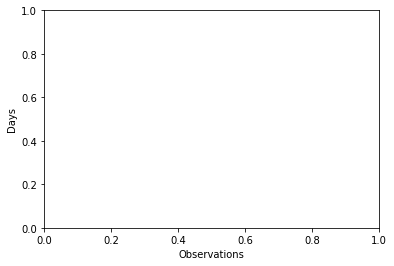

In [18]:
timers=[databird.Timestamp[databird.bird_name==i] for i in databird.bird_name.unique()]
plt.ylabel("Days")
plt.xlabel("Observations")
for times in timers:
  for timex in times:
    time_elapsed=[timex-times[0] for timex in times]
  plt.plot(np.array(time_elapsed)/ time.timedelta(days=1))

In [ ]:
for times in timers:
  time_elapsed=[timex-times[0] for timex in times]
  plt.plot(np.array(time_elapsed)/ time.timedelta(days=1))
  plt.ylabel("Days")
  plt.xlabel("Observations")

## 4.2.5: Calculating Daily Mean Speed

In this video, you will...

>Learn how to calculate and plot daily mean speed

In [19]:
databird=pd.read_csv("https://courses.edx.org/assets/courseware/v1/6184eb0f87c7b58db1a5c336e436ed09/asset-v1:HarvardX+PH526x+2T2021+type@asset+block/bird_tracking.csv")
import datetime as time

timestamp=[]
for k in range(len(databird.date_time)):
  timestamp.append(time.datetime.strptime(date_str[k][:-3], "%Y-%m-%d %H:%M:%S" ))

databird["Timestamp"]=pd.Series(timestamp, index=databird.index)

times=databird.Timestamp[databird.bird_name=="Eric"]

> Otra manera de filtra los pollos es:

In [20]:
data= databird[databird.bird_name=="Eric"]
times= data.Timestamp
time_elapsed=[timex-times[0] for timex in times]
days_elapsed=np.array(time_elapsed)/ time.timedelta(days=1)

> Obtener la velocidad exacta realizada por dia.

In [21]:
next_day=1
inds=[]
daily_mean_speed=[]
for (i,t) in enumerate(days_elapsed):
  if t < next_day:
    inds.append(i)
  else:
    #compute speed mean
    daily_mean_speed.append(np.mean(data.speed_2d[inds]))
    next_day+=1
    inds=[]

>Lo graficamos

Text(0, 0.5, 'Mean Speed for day (m/s)')

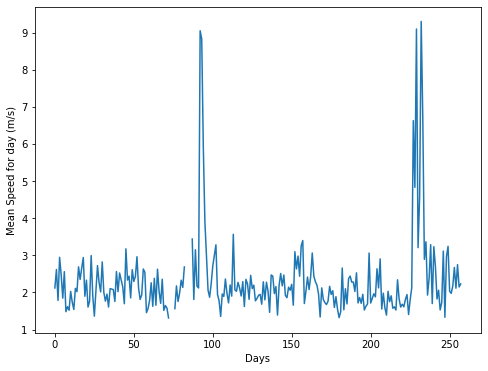

In [22]:
plt.figure(figsize=(8,6))
plt.plot(daily_mean_speed)
plt.xlabel("Days")
plt.ylabel("Mean Speed for day (m/s)")

In [23]:
data= databird[databird.bird_name== "Sanne"]
data

,Unnamed: 0,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name,Timestamp
40916,40916,55,2013-08-15 00:01:08+00,833,-91.499509,49.931065,2.281893,0.372156,Sanne,2013-08-15 00:01:08
40917,40917,54,2013-08-15 00:31:00+00,833,-141.804053,49.931076,2.281900,1.318484,Sanne,2013-08-15 00:31:00
40918,40918,55,2013-08-15 01:01:19+00,833,-10.651840,49.931016,2.281933,0.076158,Sanne,2013-08-15 01:01:19
40919,40919,56,2013-08-15 01:31:38+00,833,14.727689,49.931053,2.281911,0.014142,Sanne,2013-08-15 01:31:38
40920,40920,55,2013-08-15 02:01:24+00,833,-169.882200,49.931042,2.281893,0.094340,Sanne,2013-08-15 02:01:24
...,...,...,...,...,...,...,...,...,...,...
61915,61915,11,2014-04-30 22:00:08+00,833,45.448157,51.352572,3.177151,0.208087,Sanne,2014-04-30 22:00:08
61916,61916,6,2014-04-30 22:29:57+00,833,-112.073055,51.352585,3.177144,1.522662,Sanne,2014-04-30 22:29:57
61917,61917,5,2014-04-30 22:59:52+00,833,69.989037,51.352622,3.177257,3.120545,Sanne,2014-04-30 22:59:52
61918,61918,16,2014-04-30 23:29:43+00,833,88.376373,51.354641,3.181509,0.592115,Sanne,2014-04-30 23:29:43


## 4.2.6: Using the Cartopy Library

In this video, you will...

>Learn how to download and install Cartopy, a library that provides cartographic tools for Python

>Learn how to use Cartopy to plot data on a cartographic projection

In [25]:
% pip install Cartopy

In [1]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt


>Para projectar

In [2]:
proj=ccrs.Mercator()

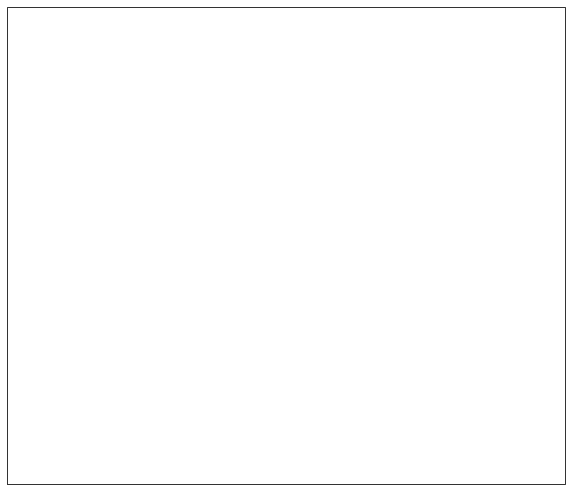

In [4]:
plt.figure(figsize=(10,10))
ax=plt.axes(projection=proj)
#ax.set_extent((-25.0,28.0,52.0,10.0))

In [ ]:
bird_names= databird.bird_name.unique()
for name in bird_names:
  ix=databird["bird_name"]==name
  y,x=databird.latitude[ix], databird.longitude[ix]
  ax.plot(x,y,".", transform=ccrs.Geodetic(),label=name)

